In [1]:
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import cv2

Untuk jupyter local, butuh cv2(open cv)

In [2]:
#pip install opencv-python

In [3]:
# obselete
def wrapDataSim1(data):
    return {'time':data[0], 'numerik_x_velocity':data[1], 'numerik_y_velocity':data[2],
            'numerik_x_pos':data[3], 'numerik_y_pos':data[4],
            'analitik_x_velocity':data[5], 'analitik_y_velocity':data[6],
            'analitik_x_pos':data[7], 'analitik_y_pos':data[8]}

In [4]:
# inisialisasi part 1
# 9 column


# kecepatan awal
startingVelocity = 50
# timeStep
timeStep = 0.01
gravity = -9.806
# sudeut awal
angle = 35 # degree 

# obselete
simul1Data = []


# ini numerik array dari posisi x & y
# time -> waktunya
num_posy_arr = [0]
num_posx_arr = [0]
time_arr = [0]
# ini numerik array dari velocity x & y
num_vely_arr = [(startingVelocity *  math.sin(math.radians(angle)))]
num_velx_arr = [(startingVelocity *  math.cos(math.radians(angle)))]

# ini analitik array, x & y
ana_posy_arr = [0]
ana_posx_arr = [0]


In [5]:
# simulasi part 1
# no air resistance, analitik-numerik 

# stop
stop = False

# perulangan
while not stop :
    # simpen temp variable, velocity & pos
    # numerik
    # sesuai rumus
    temp_velx = num_velx_arr[-1]
    temp_vely = num_vely_arr[-1] + gravity * timeStep
    temp_posx = num_posx_arr[-1] + temp_velx * timeStep
    temp_posy = num_posy_arr[-1] + temp_vely * timeStep

    # cek posisi temp y > 0
    if temp_posy >= 0 :
        # masukin ke array
        # data valid
        num_velx_arr.append(temp_velx)
        num_vely_arr.append(temp_vely)
        num_posx_arr.append(temp_posx)
        num_posy_arr.append(temp_posy)
        time_arr.append(time_arr[-1] + timeStep)
    else :
        # y < 0
        # stop
        stop = True   

# hitung analitik
for time in time_arr :
    # sesuai rumus
    ana_posy_arr.append(ana_posy_arr[0] + startingVelocity *  math.sin(math.radians(angle))*time + (0.5 * gravity * time ** 2))
    ana_posx_arr.append(ana_posx_arr[0] + startingVelocity *  math.cos(math.radians(angle))*time)

In [6]:
# validasi
# cek waktu
# rumus
ana_time =  -2* (startingVelocity *  math.sin(math.radians(angle))) / gravity
num_time = time_arr[-1]

# cek jarak
# rumus
ana_range = startingVelocity *  math.cos(math.radians(angle)) * ana_time
num_range = num_posx_arr[-1]

In [7]:
# gambar plot
def drawPlot(list1, list2) :
    plt.style.use('seaborn-white')
    plt.plot(list1[0], list1[1], color="green", label=list1[-1])
    plt.plot(list2[0], list2[1], color="orange", label=list2[-1])
    max_x = max([max(list1[0]), max(list2[0])])
    max_y = max([max(list1[1]), max(list2[1])])
    min_x = min([min(list1[0]), min(list2[0])])
    min_y = min([min(list1[1]), min(list2[1])])
    plt.xlim(min_x,max_x+10)
    plt.ylim(min_y,max_y+4)
    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=16)
    plt.legend()
    plt.show()
    plt.close('all')

Simulasi 1, Validasi
Total Waktu - Analitik , Numerik
5.84923961198293 , 5.82999999999992
Total Range - Analitik , Numerik
239.5708292845983 , 238.7828209102435


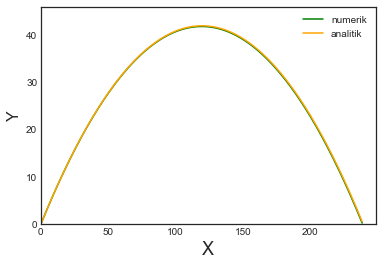

In [8]:
print('Simulasi 1, Validasi')
print("Total Waktu - Analitik , Numerik\n%s , %s" % (ana_time, num_time))
print("Total Range - Analitik , Numerik\n%s , %s" % (ana_range, num_range))
drawPlot([num_posx_arr, num_posy_arr, 'numerik'], [ana_posx_arr, ana_posy_arr, 'analitik'])

In [9]:
# inisialisasi part 2
# waktu
time_arr_sim2 = [0]

# posisi numerik x & y -> air resistance 
num_posy_arr_sim2 = [0]
num_posx_arr_sim2 = [0]
gravity = -9.806


# D
constantD = 0.0013
# m
mass = 0.15

# kecepatan x,y -> air resistance
num_vely_arr_sim2 = [(startingVelocity *  math.sin(math.radians(angle)))]
num_velx_arr_sim2 = [(startingVelocity *  math.cos(math.radians(angle)))]


In [10]:
# simulasi part 2
# air resistance, analitik-numerik 

# stop
stop = False

# perulangan
while not stop :
    # rumus nentuin ax
    viva = math.sqrt((num_velx_arr_sim2[-1] **2) + (num_vely_arr_sim2[-1] ** 2))
    ax = -1*((constantD/mass)*viva*num_velx_arr_sim2[-1])
    ay =(gravity)+(-1*(constantD/mass)*viva*num_vely_arr_sim2[-1])
    # sesuai rumus
    
    # simpen temp variable, velocity & pos
    # numerik
    # sesuai rumus
    temp_velx = num_velx_arr_sim2[-1] + (ax * timeStep)
    temp_vely = num_vely_arr_sim2[-1] + (ay * timeStep)
    temp_posx = num_posx_arr_sim2[-1] + (temp_velx * timeStep)
    temp_posy = num_posy_arr_sim2[-1] + (temp_vely * timeStep)
    
    # cek y > 0
    if temp_posy >= 0 :
        # masukin data ke array
        num_velx_arr_sim2.append(temp_velx)
        num_vely_arr_sim2.append(temp_vely)
        num_posx_arr_sim2.append(temp_posx)
        num_posy_arr_sim2.append(temp_posy)
        time_arr_sim2.append(time_arr_sim2[-1] + timeStep)
    else :
        # y < 0
        # stop perulangan 
        stop = True   

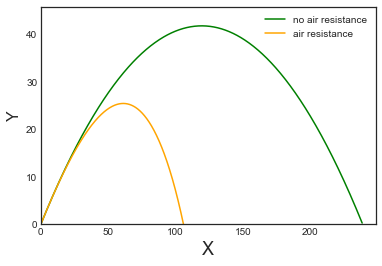

In [11]:
drawPlot([num_posx_arr, num_posy_arr, 'no air resistance'], [num_posx_arr_sim2, num_posy_arr_sim2, 'air resistance'])

In [12]:
# no documentation
def animate(line1, line2, timeStep=0.01,fps=30,filename='animasi', folder='images') :
    # line1 & 2 -> x,y,name
    
    def save_frame(lineOne, lineTwo,limx, limy, number, absolutePath,timeStep=0.01,picturename='frame', extension='png'):
        fig = plt.figure()
        ax =  plt.subplot(111)
        ax.plot(lineOne[0], lineOne[1], color="grey", label=lineOne[-1])
        ax.plot(lineTwo[0], lineTwo[1], color="blue", label=lineTwo[-1])
        ax.plot([0],[0], color="purple", label='time : {0:.3f}s'.format(number * timeStep))
        
        plt.xlim(limx[0]-3,limx[-1]+3)
        plt.ylim(limy[0],limy[-1]+8)
        plt.xlabel('X', fontsize=18)
        plt.ylabel('Y', fontsize=16)
        ax.legend(loc="upper left")
        file_name = '{0}_{1}.{2}'.format(picturename, number, extension)
        # escape cahracter windows
        abs_filepath = absolutePath + '\\' + file_name
        fig.savefig(abs_filepath)
        plt.close('all')
        
        return abs_filepath
    
    
    ##############
    absPath = os.getcwd()+'\\'+folder
    if not os.path.exists(absPath) :
        try :
            os.mkdir(absPath)
        except TypeError :
            print('Already Exist')
    
    
    
    limx = [min([min(line1[0]), min(line2[0])]), max([max(line1[0]), max(line2[0])])]   
    limy = [min([min(line1[1]), min(line2[1])]), max([max(line1[1]), max(line2[1])])]
    total_frame = len(line1[1])
    frame_list = []
    
    for num in range(1, total_frame) :
        if num > len(line1[1]) :
            lim_lineOne = len(line1[1])
        else :
            lim_lineOne = num
                                         
        if num > len(line2[1]) :
            lim_lineTwo = len(line2[1])
        else :
            lim_lineTwo = num                                                     
        frame_list.append(save_frame([line1[0][:lim_lineOne], line1[1][:lim_lineOne], line1[-1]],
                                     [line2[0][:lim_lineTwo], line2[1][:lim_lineTwo], line2[-1]],
                                     limx, limy,
                                     num-1, absPath, timeStep=timeStep
                                    ))
        
        
    ## ulangi frame terakhir 50x
    for i in range(0,50):
        frame_list.append(frame_list[-1])
    
    
    ### part to animate using cv2
    # https://stackoverflow.com/questions/44947505/how-to-make-a-movie-out-of-images-in-python
    video_name = filename+'.mp4'

    frame = cv2.imread(frame_list[0])
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0,  fps, (width,height))

    for image in frame_list:
        video.write(cv2.imread(image))

    cv2.destroyAllWindows()
    video.release()
    
    
    
    
    ####
    #x = input('Press Enter to delete temp file ...')
    for pat in frame_list :
        if os.path.isfile(pat) :
            os.remove(pat)       
    os.rmdir(absPath)
    
    print('Done file : {}'.format(video_name))
    

In [13]:
animate(line1=[num_posx_arr, num_posy_arr, 'no air resistance'], line2=[num_posx_arr_sim2, num_posy_arr_sim2, 'air resistance'], timeStep=timeStep, fps=24)

Done file : animasi.mp4


In [14]:
%%HTML
<!--Magic Cell--!>
<!--https://stackoverflow.com/questions/18019477/how-can-i-play-a-local-video-in-my-ipython-notebook--!>
<video width="600" height="480" controls>
  <source src='animasi.mp4' type="video/mp4">
</video>